In [210]:
# %cd /content/drive/MyDrive/Colab Notebooks/fastai-practice

# !git config --global user.email 'intaek428@gmail.com'
# !git config --global user.name 'ITHwang'

# !git add .
# !git commit -m '4.4.1까지'
# !git push

!pip install -Uqq fastbook
# !pip install fastai --upgrade

In [211]:
import fastbook
# fastbook.setup_book() # to connect the colab notebook to google drive using an authentication token
from fastai.vision.all import *

In [212]:
import numpy as np

In [213]:
data = [[1,2,3,],[4,5,6]]
arr = array(data)
tns = tensor(data)

arr

array([[1, 2, 3],
       [4, 5, 6]])

In [214]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

In [215]:
tns.type()

'torch.LongTensor'

In [216]:
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [217]:
from PIL import Image

In [218]:
threes_t = (path/'train'/'3').ls().sorted()
sevens_t = (path/'train'/'7').ls().sorted()
three_tensors_t = [tensor(Image.open(o)) for o in threes_t]
seven_tensors_t = [tensor(Image.open(o)) for o in sevens_t]
stacked_threes_t = torch.stack(three_tensors_t).float() / 255
stacked_sevens_t = torch.stack(seven_tensors_t).float() / 255

threes_v = (path/'valid'/'3').ls().sorted()
sevens_v = (path/'valid'/'7').ls().sorted()
three_tensors_v = [tensor(Image.open(o)) for o in threes_v]
seven_tensors_v = [tensor(Image.open(o)) for o in sevens_v]
stacked_threes_v = torch.stack(three_tensors_v).float() / 255
stacked_sevens_v = torch.stack(seven_tensors_v).float() / 255

mean3 = stacked_threes_t.mean(0)
mean7 = stacked_sevens_t.mean(0)

In [219]:
# mean absolute difference
def mnist_distance(a, b): return (a - b).abs().mean((-1, -2))

In [220]:
a_3 = stacked_threes_t[1]
mnist_distance(a_3, mean3)

tensor(0.1114)

In [221]:
# use broadcasting
valid_3_dist = mnist_distance(stacked_threes_v, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [222]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [223]:
accuracy_3s = is_3(stacked_threes_v).float().mean()
accuracy_7s = (1 - is_3(stacked_sevens_v).float()).mean()
(accuracy_3s + accuracy_7s) / 2

tensor(0.9511)

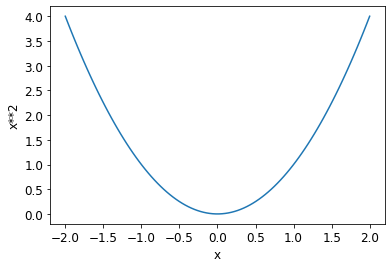

In [224]:
import matplotlib.pyplot as plt

def f(x): return x**2

def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
    x = torch.linspace(min,max)
    fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
    
plot_function(f, 'x', 'x**2')

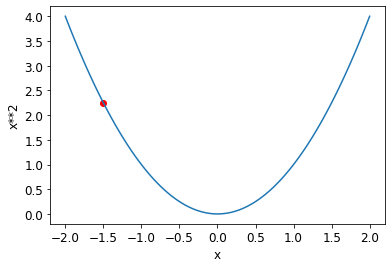

In [225]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')


In [226]:
xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()

In [227]:
xt.grad

tensor(6.)

In [228]:
time = torch.arange(0, 20).float();
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

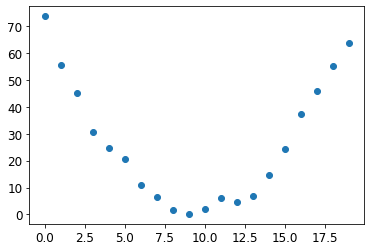

In [229]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [230]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

In [231]:
params = torch.randn(3).requires_grad_()

In [232]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [233]:
preds = f(time, params)

In [234]:
def show_preds(preds, ax=None):
    if ax is None: ax = plt.subplots()[1]
    ax.scatter(time, speed) # speed was defined
    ax.scatter(time, to_np(preds), color='red')
    # ax.set_ylim(-300, 100)


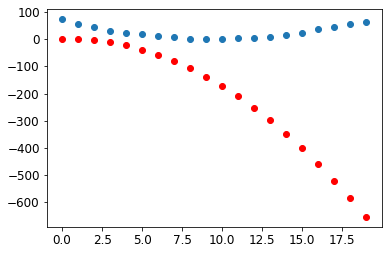

In [235]:
show_preds(preds)

In [236]:
loss = mse(preds, speed)
loss

tensor(324.6665, grad_fn=<SqrtBackward0>)

In [237]:
loss.backward()
params.grad

tensor([-167.1784,  -10.6796,   -0.7534])

In [238]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None
params 

tensor([-1.9082,  1.7650,  1.0495], requires_grad=True)

In [239]:
# 두 번째 학습
preds = f(time, params)
mse(preds, speed)

tensor(324.3859, grad_fn=<SqrtBackward0>)

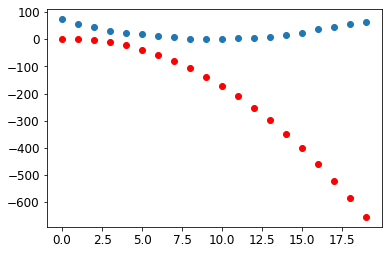

In [240]:
show_preds(preds)

In [241]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn:
        print(type(loss)) 
        print(loss.item())
    return preds

In [242]:
for i in range(10): apply_step(params)

<class 'torch.Tensor'>
324.3858947753906
<class 'torch.Tensor'>
324.1052551269531
<class 'torch.Tensor'>
323.8246154785156
<class 'torch.Tensor'>
323.5440368652344
<class 'torch.Tensor'>
323.26336669921875
<class 'torch.Tensor'>
322.9827575683594
<class 'torch.Tensor'>
322.7021484375
<class 'torch.Tensor'>
322.4215393066406
<class 'torch.Tensor'>
322.14093017578125
<class 'torch.Tensor'>
321.8603515625


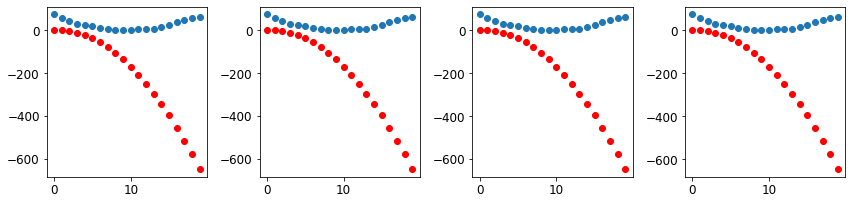

In [243]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: 
    show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [244]:
train_x = torch.cat([stacked_threes_t, stacked_sevens_t])
train_x.shape

torch.Size([12396, 28, 28])

In [245]:
train_x = train_x.view(-1, 28*28)
train_x.shape

torch.Size([12396, 784])

In [246]:
train_y = tensor([1]*len(threes_t) + [0]*len(sevens_t)).unsqueeze(1)
train_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [247]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [248]:
valid_x = torch.cat([stacked_threes_v, stacked_sevens_v]).view(-1, 28*28)
valid_y = tensor([1]*len(threes_v) + [0]*len(sevens_v)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [249]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()
weights = init_params((28*28, 1))
bias = init_params(1)

In [250]:
bias.shape

torch.Size([1])

In [251]:
(train_x[0]*weights.T).sum() + bias

tensor([1.2028], grad_fn=<AddBackward0>)

In [252]:
def linear1(xb): return xb @ weights + bias
preds = linear1(train_x)
preds.shape

torch.Size([12396, 1])

In [253]:
corrects = (preds>0.5).float() == train_y
corrects

tensor([[ True],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [254]:
corrects.float().mean().item()

0.5765569806098938

In [255]:
def sigmoid(x): return 1 / (1 + torch.exp(-x))

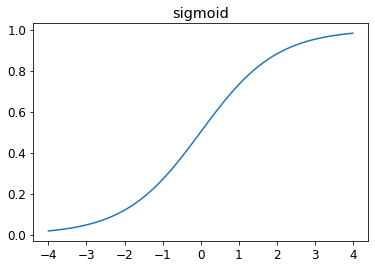

In [256]:
plot_function(torch.sigmoid, title='sigmoid', min=-4, max=4)

In [257]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [258]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 1, 13,  8,  2,  3]),
 tensor([12, 11,  5,  7, 14]),
 tensor([ 4,  0, 10,  9,  6])]

In [259]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [260]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [261]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([ 1,  6, 12,  2, 10, 11]), ('b', 'g', 'm', 'c', 'k', 'l')),
 (tensor([17, 13, 23, 15, 21, 22]), ('r', 'n', 'x', 'p', 'v', 'w')),
 (tensor([24, 16,  4, 19, 14, 25]), ('y', 'q', 'e', 't', 'o', 'z')),
 (tensor([18, 20,  9,  7,  3,  0]), ('s', 'u', 'j', 'h', 'd', 'a')),
 (tensor([8, 5]), ('i', 'f'))]

In [262]:
# for x, y in dl:
#     pred = model(x)
#     loss = loss_func(pred, y)
#     loss.backward()
#     parameters -= parameters.grad * lr

In [263]:
weights = init_params((28*28, 1))
bias = init_params(1)

In [264]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [265]:
valid_dl = DataLoader(valid_dset, batch_size=256)
valid_dl

In [266]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [267]:
preds = linear1(batch)
preds

tensor([[-2.1293],
        [-5.6582],
        [ 5.2836],
        [ 1.3512]], grad_fn=<AddBackward0>)

In [268]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5252, grad_fn=<MeanBackward0>)

In [269]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0109), tensor([-0.0667]))

In [270]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [271]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad


(tensor(-0.0218), tensor([-0.1334]))

In [272]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [273]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [274]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [275]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.4613

In [276]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [277]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6

In [278]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end='')

0.81490.89890.92570.94380.95020.95460.95750.95940.95940.96040.96090.96330.96480.96480.96580.96630.96770.96820.96820.9687

In [279]:
linear_model = nn.Linear(28*28, 1)
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [280]:
class BasicOptim:
    def __init__(self, params, lr): self.params, self.lr = list(params), lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr
    
    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [281]:
opt = BasicOptim(linear_model.parameters(), lr)

In [282]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [283]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end='')

In [284]:
train_model(linear_model, 20)

0.49320.86770.82280.90820.93360.94630.95550.96190.96580.96730.96820.97120.97310.97460.97610.97650.97750.9780.97850.9785

In [285]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.49320.90040.81690.90920.93120.94630.9560.96190.96530.96820.96870.97070.97360.97460.97610.9770.97750.9780.9780.979

In [291]:
dls = DataLoaders(dl, valid_dl)

In [292]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, 
                loss_func=mnist_loss, metrics=batch_accuracy)

In [293]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636485,0.503522,0.495584,00:00
1,0.532609,0.195303,0.832679,00:00
2,0.195575,0.181493,0.835623,00:00
3,0.085581,0.106257,0.911187,00:00
4,0.045028,0.077704,0.933268,00:00
5,0.029185,0.062381,0.947007,00:00
6,0.022686,0.052789,0.954858,00:00
7,0.019814,0.046373,0.962218,00:00
8,0.018365,0.041853,0.965653,00:00
9,0.017497,0.038521,0.967125,00:00
